## Mud card
- **Can you talk about the variance/bias relationship one more time?**
   - overfitting / high variance model / low bias model 
      - the model is too complex
      - it performs very well on the training data (aka overfits the training data) 
      - but it performs poorly on new data points
   - underfitting / low variance model / high bias model
      - the model is too simple
      - it performs poorly on the training data (aka underfits)
      - and it also performs poorly on new data points
      

- **Can we go over how to properly split your data again?**
   - today and tomorrow :)

## Cross Validation with iid data
By the end of this lecture, you will be able to
- apply simple CV and k-fold CV to datasets
- use GridSearchCV with pipelines
- apply stratified splits to imbalanced data

## The goals of cross validation
- we want to find the best hyper-parameters of our ML algorithms
   - fit model to training data (`.fit(X_train,y_train)`)
   - evaluate model on CV set (`.predict(X_CV,y_CV)`)
   - we find hyper-parameter values that optimize the CV score
- we want to know how the model will perform on previously unseen data
   - apply our final model on the test set (`.predict(X_test,y_test)`)
   
### We need to split the data into three parts!

## How should we split the data into train/CV/test?

- data is **Independent and Identically Distributed** (iid)
   - all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples
   - identify cats and dogs on images
   - predict the house price
   - predict if someone's salary is above or below 50k
- examples of not iid data (more on this next time):
   - data generated by time-dependent processes
   - data has group structure (samples collected from e.g., different subjects, experiments, measurement devices)

## CV steps of iid data to avoid mistakes 
- shuffle and split the data
- preprocess (fit_transform train, transform the rest)
- decide on the evaluation metric
- decide ML algo, which hyper-parameters you tune, and what values you want to try
- loop over all combinations and save train and CV scores
- find best model based on optimal CV score
- report test score using the best model
- repeat a couple of times with different random states to estimate uncertainty

## <font color='lightgray'>Cross Validation with iid data</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- **apply simple CV and k-fold CV to datasets**
- <font color='lightgray'>use GridSearchCV and pipelines</font>
- <font color='lightgray'>apply stratified splits to imbalanced data</font>

## Splitting strategies for iid data: basic approach
- the basic aproach:
   - 60% train, 20% CV, 20% test 
   - the ratios can vary somewhat but the training set should contain most of your points
   - if you redo the split with a different random state, the results will change
      - repeat the split a couple of times to measure model uncertainty due to splitting

### Let's put everything together!

In [1]:
import numpy as np
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 100

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [2]:
def ML_pipeline_basic(X,y,random_state):
    # split the data
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state = random_state)
    # simple preprocessing
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_CV = scaler.transform(X_CV)
    X_test = scaler.transform(X_test)
    # tune ridge hyper-parameter, alpha
    alpha = np.logspace(-3,4,num=8)
    train_score = []
    CV_score = []
    regs = []
    for a in alpha:
        reg = Ridge(alpha = a)
        reg.fit(X_train,y_train)
        train_score.append(mean_squared_error(y_train,reg.predict(X_train)))
        CV_score.append(mean_squared_error(y_CV,reg.predict(X_CV)))
        regs.append(reg)
    # find the best alpha
    best_alpha = alpha[np.argmin(CV_score)]
    # grab the best model
    reg = regs[np.argmin(CV_score)]
    # calculate holdout score
    test_score = mean_squared_error(y_test,reg.predict(X_test))
    return best_alpha,np.min(CV_score),test_score

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib

CV_scores = []
test_scores = []
for i in range(10):
    best_alpha, CV_score, test_score = ML_pipeline_basic(X[:, np.newaxis],y, i*42 )
    CV_scores.append(CV_score)
    test_scores.append(test_score)
    
print('CV MSE:',np.around(np.mean(CV_scores),2),'+/-',np.around(np.std(CV_scores),2))
print('test MSE:',np.around(np.mean(test_scores),2),'+/-',np.around(np.std(test_scores),2))

CV MSE: 0.18 +/- 0.04
test MSE: 0.21 +/- 0.05


## Exercise 1
Add a couple of lines of code to `ML_pipeline_basic` to plot the train and the CV scores as a function of alpha. Add x and y labels and also a legend.

In [11]:
def ML_pipeline_basic(X,y,random_state):
    # split the data
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state = random_state)
    # simple preprocessing
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_CV = scaler.transform(X_CV)
    X_test = scaler.transform(X_test)
    # tune ridge hyper-parameter, alpha
    alpha = np.logspace(-3,4,num=8)
    train_score = []
    CV_score = []
    regs = []
    for a in alpha:
        reg = Ridge(alpha = a)
        reg.fit(X_train,y_train)
        train_score.append(mean_squared_error(y_train,reg.predict(X_train)))
        CV_score.append(mean_squared_error(y_CV,reg.predict(X_CV)))
        regs.append(reg)
    plt.plot(alpha, train_score)
    plt.plot(alpha, CV_score)
    plt.show()
    # find the best alpha
    best_alpha = alpha[np.argmin(CV_score)]
    # grab the best model
    reg = regs[np.argmin(CV_score)]
    # calculate holdout score
    test_score = mean_squared_error(y_test,reg.predict(X_test))
    return best_alpha,np.min(CV_score),test_score

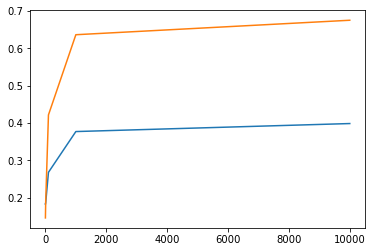

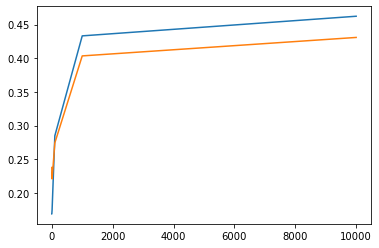

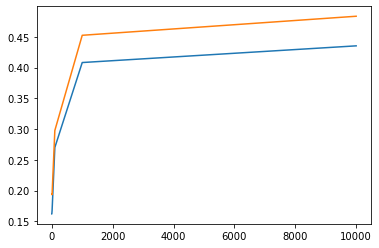

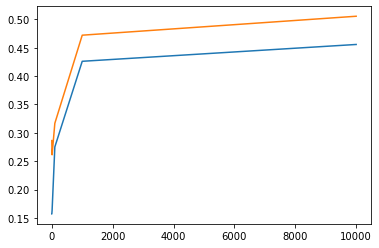

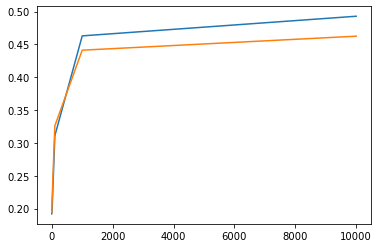

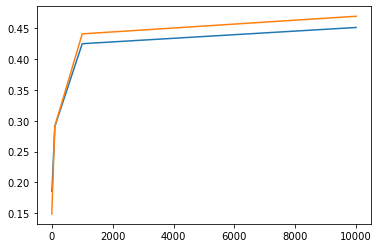

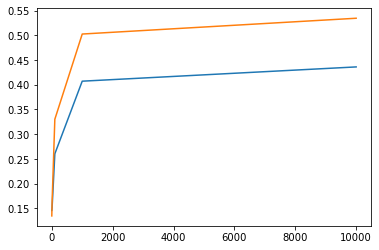

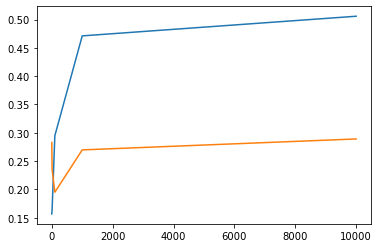

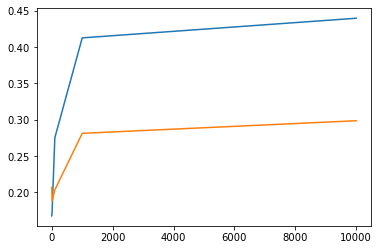

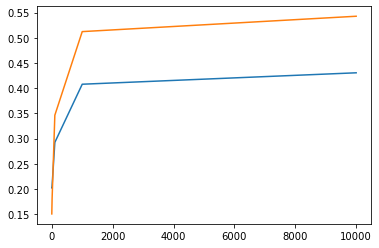

In [12]:
for i in range(10):
    best_alpha, CV_score, test_score = ML_pipeline_basic(X[:, np.newaxis],y, i*42 )

## Splitting strategies for iid data, k-fold cross validation

<center><img src="figures/grid_search_cross_validation.png" width="600"></center>


### Why shuffling iid data is important?
- by default, data is not shuffled by Kfold which can introduce errors!
<center><img src="figures/kfold.png" width="600"></center>


In [10]:
def ML_pipeline_kfold(X,y,random_state,n_folds):
    # split the data
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    CV_scores = []
    test_scores = []
    # k folds - each fold will give us a CV and a test score
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other[train_index], X_other[CV_index]
        y_train, y_CV = y_other[train_index], y_other[CV_index]
        # simple preprocessing
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_c = scaler.transform(X_CV)
        X_t = scaler.transform(X_test)
        # tune ridge hyper-parameter, alpha
        alpha = np.logspace(-5,2,num=8)
        train_score = []
        CV_score = []
        regs = []
        for a in alpha:
            reg = Ridge(alpha = a)
            reg.fit(X_train,y_train)
            train_score.append(mean_squared_error(y_train,reg.predict(X_train)))
            CV_score.append(mean_squared_error(y_CV,reg.predict(X_c)))
            regs.append(reg)
        # find the best alpha in this fold
        best_alpha = alpha[np.argmin(CV_score)]
        # grab the best model
        reg = regs[np.argmin(CV_score)]
        CV_scores.append(np.min(CV_score))
        # calculate test score using thee best model
        test_scores.append(mean_squared_error(y_test,reg.predict(X_t)))
    return CV_scores,test_scores

In [6]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib

CV_scores, test_scores = ML_pipeline_kfold(X[:,np.newaxis],y,42,5)

print('CV MSE:',np.around(np.mean(CV_scores),2),'+/-',np.around(np.std(CV_scores),2))
print('test MSE:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),3))

CV MSE: 0.18 +/- 0.04
test MSE: 0.163 +/- 0.003


## Some considerations
- 1) lots of lines of code were written, mistakes can be easily made!
- 2) kfold CV uses the same test set, so we do not estimate the uncertainty from random test sets
   - test score uncertainty is lower than in the basic approach
- 3) both approaches (basic and kfold) can fail if the data is imbalanced
   - if one class is infrequent, it can happen that one set or one fold contains 0 points from the rare class
   - sklearn will raise an error in that case
- 4) neither of these approaches work, if data is not iid!

## <font color='lightgray'>Cross Validation with iid data</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- <font color='lightgray'>apply simple CV and k-fold CV to datasets</font>
- **use GridSearchCV and pipelines**
- <font color='lightgray'>apply stratified splits to imbalanced data</font>

# 1) Let's shorten our code: GridSearchCV and pipeline in k-fold CV

In [7]:
def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    scaler = StandardScaler()
    pipe = make_pipeline(scaler,Ridge())
    # the parameter(s) we want to tune
    param_grid = {'ridge__alpha': np.logspace(-3,4,num=8)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(mean_squared_error,greater_is_better=False),
                        cv=kf, return_train_score = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

grid, test_score = ML_pipeline_kfold(X[:,np.newaxis],y,42,5)
results = pd.DataFrame(grid.cv_results_)
print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
      '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
print('test MSE:',-np.around(test_score,2))
results

CV MSE: 0.19 +/- 0.03
test MSE: 0.16


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000682,0.000119,0.000241,0.000034,0.001,{'ridge__alpha': 0.001},-0.202300,-0.157711,-0.168699,-0.160049,...,-0.187654,0.034810,3,-0.180344,-0.191596,-0.188761,-0.192012,-0.168994,-0.184341,0.008747
1,0.000678,0.000067,0.000238,0.000024,0.01,{'ridge__alpha': 0.01},-0.202294,-0.157719,-0.168705,-0.160029,...,-0.187654,0.034814,2,-0.180344,-0.191596,-0.188761,-0.192012,-0.168994,-0.184341,0.008747
2,0.000609,0.000006,0.000227,0.000002,0.1,{'ridge__alpha': 0.1},-0.202237,-0.157799,-0.168761,-0.159828,...,-0.187650,0.034859,1,-0.180344,-0.191597,-0.188762,-0.192013,-0.168995,-0.184342,0.008747
3,0.000623,0.000019,0.000229,0.000002,1,{'ridge__alpha': 1.0},-0.201740,-0.158650,-0.169361,-0.157909,...,-0.187673,0.035312,4,-0.180407,-0.191656,-0.188824,-0.192083,-0.169056,-0.184405,0.008748
4,0.000611,0.000012,0.000229,0.000007,10,{'ridge__alpha': 10.0},-0.202714,-0.170812,-0.178430,-0.145902,...,-0.192327,0.040060,5,-0.185235,-0.196205,-0.193658,-0.197511,-0.173772,-0.189276,0.008851
5,0.000630,0.000054,0.000229,0.000014,100,{'ridge__alpha': 100.0},-0.299603,-0.303486,-0.282612,-0.179732,...,-0.289302,0.064467,6,-0.279937,-0.285426,-0.288467,-0.303964,-0.266270,-0.284813,0.012232
6,0.000718,0.000172,0.000245,0.000050,1000,{'ridge__alpha': 1000.0},-0.454587,-0.475300,-0.419325,-0.279924,...,-0.430692,0.082690,7,-0.416955,-0.414514,-0.425639,-0.457985,-0.400098,-0.423038,0.019308
7,0.000620,0.000024,0.000223,0.000002,10000,{'ridge__alpha': 10000.0},-0.486653,-0.509482,-0.446598,-0.302210,...,-0.459481,0.085772,8,-0.444815,-0.440761,-0.453530,-0.489302,-0.427309,-0.451143,0.020869


### Some notable differences
- if multiple parameters give an equally good CV score, GridSearchCV returns the largest
   - my function returns the smallest
   - it's unclear which one is better
- GridSearchCV calculates only one test score
   - my function returns n_folds scores
   - the new approach refits the best model to _other and that model is used to calculate the test score
   - it's unclear which one is better
      - my approach allows to calculate some uncertainty due to splitting (not on test)
      - the GridSearchCV approach returns one test score but it is based on more data (likely more accurate)
- 7 lines of code in GridSearchCV
   - 28 lines of code in my function

## 2) Estimate the uncertainty from random test sets
### Exercise 2 
Calculate the test score for 10 different random splits. What's the mean and std test score?

## <font color='lightgray'>Cross Validation with iid data</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- <font color='lightgray'>apply simple CV and k-fold CV to datasets</font>
- <font color='lightgray'>use GridSearchCV and pipelines</font>
- **apply stratified splits to imbalanced data**

## 3) Imbalanced data: use stratified folds
<center><img src="figures/stratified_kfold.png" width="600"></center>


In [10]:
from sklearn.model_selection import StratifiedKFold
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.20
 |          ``n_splits`` default value will change from 3 to 5 in v0.22.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each class's samples before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state 

Now you can
- apply simple CV and k-fold CV to datasets
- use GridSearchCV with pipelines
- apply stratified splits to imbalanced data